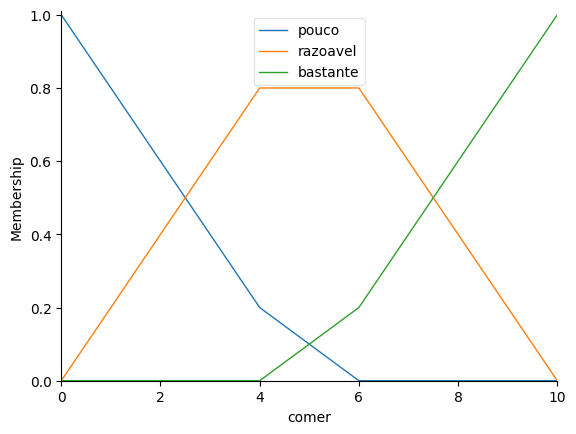

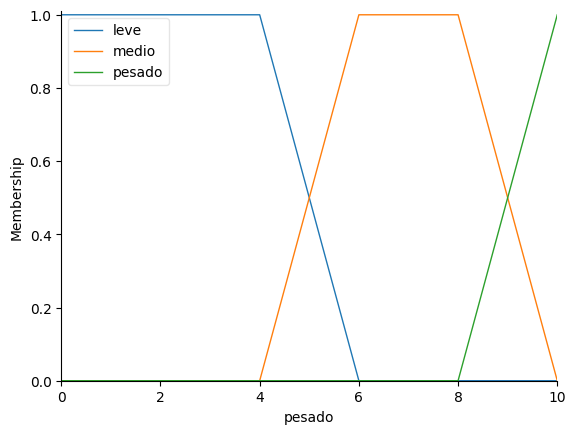

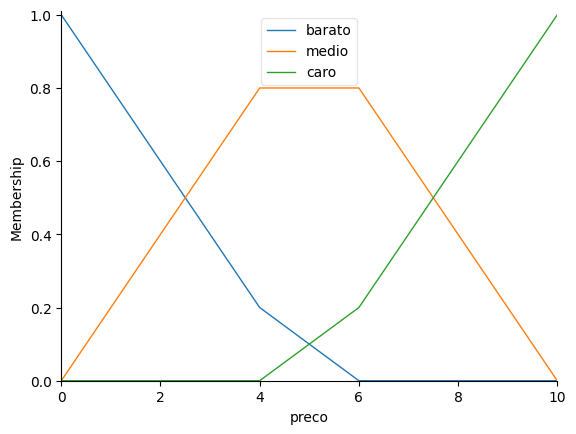

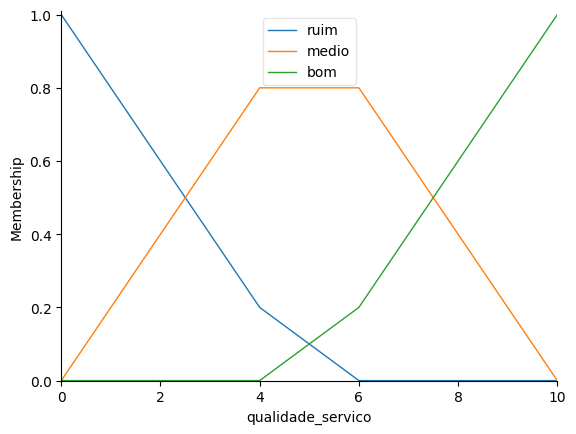

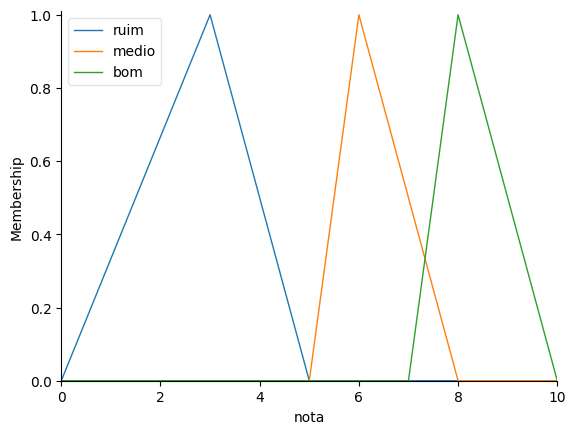

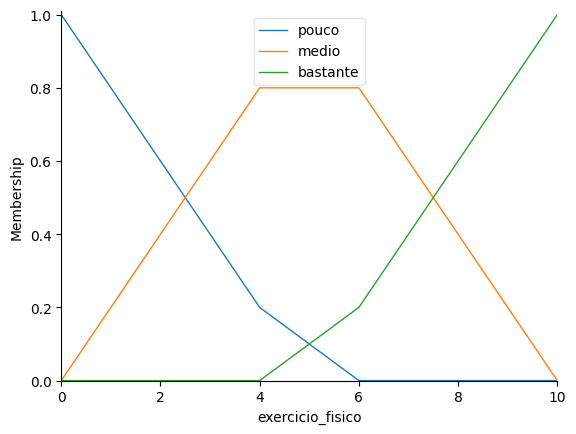

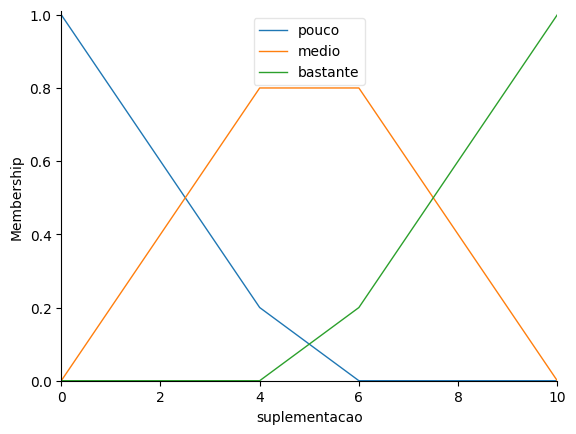

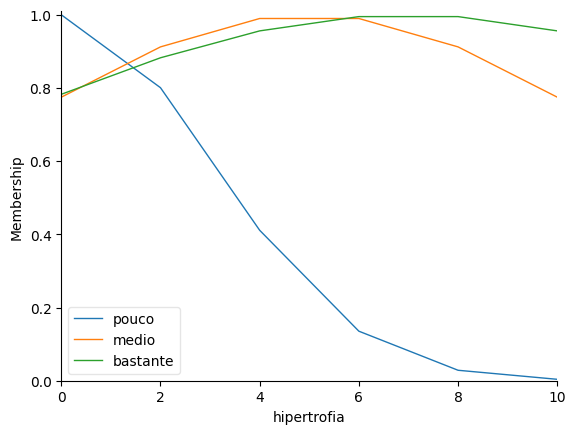

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Definição das variáveis de entrada (Antecedentes)
comer = ctrl.Antecedent(np.arange(0, 11, 2), 'comer')
preco = ctrl.Antecedent(np.arange(0, 11, 2), 'preco')
qualidade_servico = ctrl.Antecedent(np.arange(0, 11, 2), 'qualidade_servico')
exercicio_fisico = ctrl.Antecedent(np.arange(0, 11, 2), 'exercicio_fisico')
suplementacao = ctrl.Antecedent(np.arange(0, 11, 2), 'suplementacao')


# Definição das variáveis de saída (Consequent)
saida = ctrl.Consequent(np.arange(0, 11, 2), 'pesado')
nota = ctrl.Consequent(np.arange(0, 11, 1), 'nota')
hipertrofia = ctrl.Consequent(np.arange(0, 11, 2), 'hipertrofia')

# automf -> Atribuição de categorias automaticamente

comer.automf(names=['pouco','razoavel','bastante'],)
preco.automf(names=['barato','medio','caro'])
qualidade_servico.automf(names=['ruim','medio','bom'])
exercicio_fisico.automf(names=['pouco','medio','bastante'])
suplementacao.automf(names=['pouco','medio','bastante'])


# Atribuição manual de funções de pertinência para a variável de saída "saida"
saida['leve'] = fuzz.trapmf(saida.universe, [0, 0, 4, 6])
saida['medio'] = fuzz.trapmf(saida.universe, [4, 6, 8, 10])
saida['pesado'] = fuzz.trapmf(saida.universe, [8, 10, 10, 10])

# Atribuição manual de funções de pertinência para a variável de saída "nota"
nota['ruim'] = fuzz.trimf(nota.universe,[0,3,5])
nota['medio'] = fuzz.trimf(nota.universe,[5,6,8])
nota['bom'] = fuzz.trimf(nota.universe,[7,8,10])

# Atribuição manual de funções de pertinência para a variável de saída "hipertrofia"
hipertrofia['pouco'] = fuzz.gaussmf(hipertrofia.universe, 0, 3)
hipertrofia['medio'] = fuzz.gaussmf(hipertrofia.universe, 5, 7)
hipertrofia['bastante'] = fuzz.gaussmf(hipertrofia.universe, 7, 10)

#Visualizando as variáveis

comer.view()
saida.view()
preco.view()
qualidade_servico.view()
nota.view()
exercicio_fisico.view()
suplementacao.view()
hipertrofia.view()


Comer 5 
Saida de  6.51

Preco 5 
Serviço 5 
Nota  5.76

Exercicio 5 
Suplementacao 5 
Hipertrofia  5.00


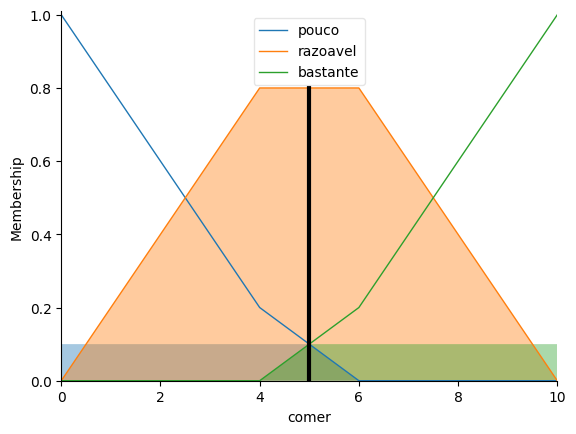

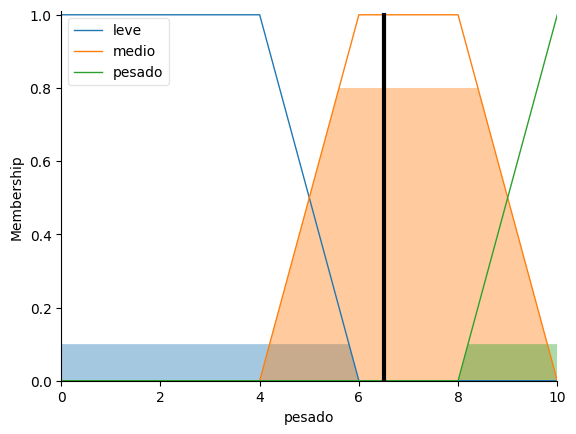

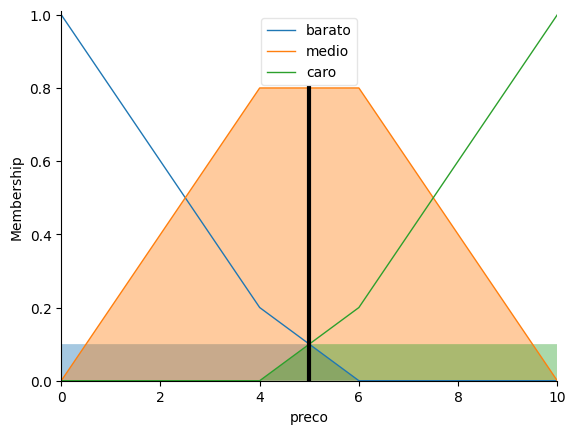

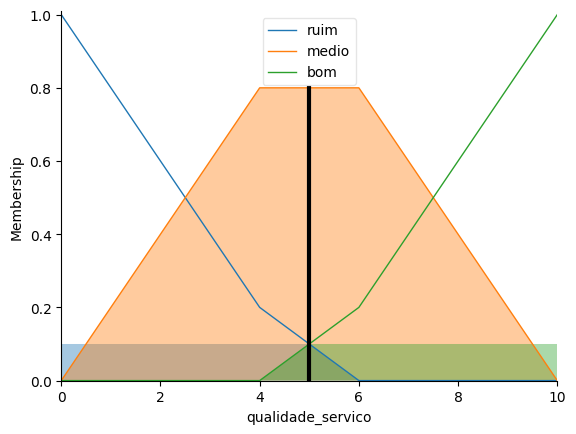

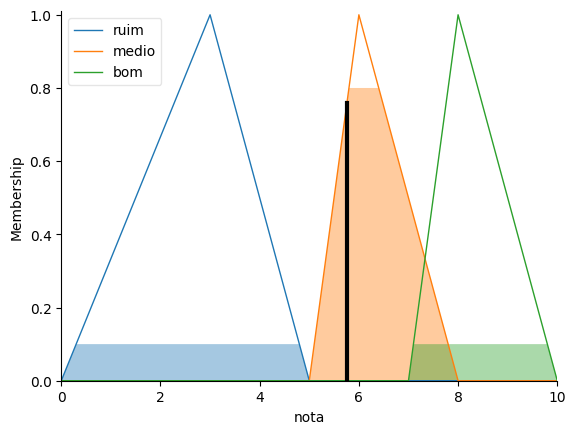

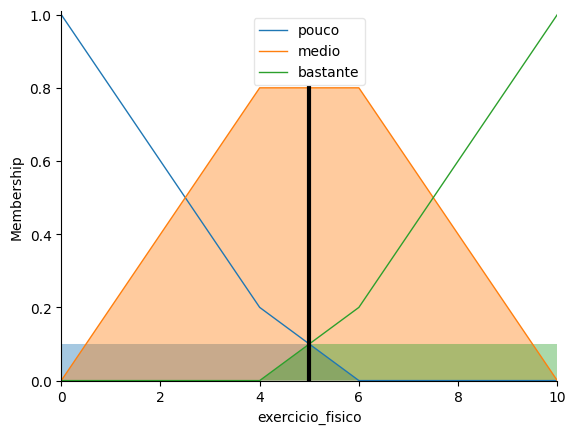

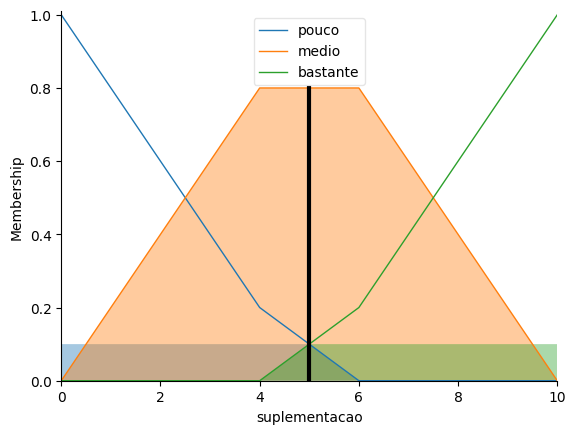

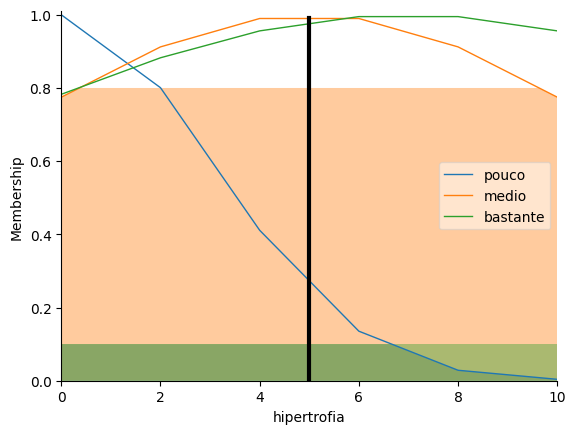

In [4]:
# Regras para a variável de saída "pesado"
regra_1 = ctrl.Rule(comer['bastante'], saida['pesado'])
regra_2 = ctrl.Rule(comer['razoavel'], saida['medio'])
regra_3 = ctrl.Rule(comer['pouco'], saida['leve'])
controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3])

# Regras para a variável de saída "nota"
regra_4 = ctrl.Rule(preco['caro'] & qualidade_servico['bom'], nota['medio'])
regra_5 = ctrl.Rule(preco['caro'] & qualidade_servico['medio'], nota['medio'])
regra_6 = ctrl.Rule(preco['caro'] & qualidade_servico['ruim'], nota['ruim'])
regra_7 = ctrl.Rule(preco['medio'] & qualidade_servico['bom'], nota['bom'])
regra_8 = ctrl.Rule(preco['medio'] & qualidade_servico['medio'], nota['medio'])
regra_9 = ctrl.Rule(preco['medio'] & qualidade_servico['ruim'], nota['ruim'])
regra_10 = ctrl.Rule(preco['barato'] & qualidade_servico['bom'], nota['bom'])
regra_11 = ctrl.Rule(preco['barato'] & qualidade_servico['medio'], nota['bom'])
regra_12 = ctrl.Rule(preco['barato'] & qualidade_servico['ruim'], nota['medio'])
controlador2 = ctrl.ControlSystem([regra_4, regra_5, regra_6, regra_7, regra_8, regra_9, regra_10, regra_11, regra_12])

# Regras para a variável de saída "hipertrofia"
regra_13 = ctrl.Rule(exercicio_fisico['bastante'] & suplementacao['bastante'], hipertrofia['bastante'])
regra_14 = ctrl.Rule(exercicio_fisico['bastante'] & suplementacao['medio'], hipertrofia['bastante'])
regra_15 = ctrl.Rule(exercicio_fisico['bastante'] & suplementacao['pouco'], hipertrofia['medio'])
regra_16 = ctrl.Rule(exercicio_fisico['medio'] & suplementacao['bastante'], hipertrofia['medio'])
regra_17 = ctrl.Rule(exercicio_fisico['medio'] & suplementacao['medio'], hipertrofia['medio'])
regra_18 = ctrl.Rule(exercicio_fisico['medio'] & suplementacao['pouco'], hipertrofia['pouco'])
regra_19 = ctrl.Rule(exercicio_fisico['pouco'] & suplementacao['bastante'], hipertrofia['medio'])
regra_20 = ctrl.Rule(exercicio_fisico['pouco'] & suplementacao['medio'], hipertrofia['medio'])
regra_21 = ctrl.Rule(exercicio_fisico['pouco'] & suplementacao['pouco'], hipertrofia['pouco'])
controlador3 = ctrl.ControlSystem([regra_13, regra_14, regra_15, regra_16, regra_17, regra_18, regra_19, regra_20, regra_21])

#Simulando
CalculoSaida = ctrl.ControlSystemSimulation(controlador)
CalculoNota = ctrl.ControlSystemSimulation(controlador2)
CalculoHipertrofia = ctrl.ControlSystemSimulation(controlador3)


notaComer = int(input('Comer: '))
CalculoSaida.input['comer'] = notaComer
CalculoSaida.compute()

notaPreco = int(input('Preco: '))
notaServico = int(input('Serviço: '))
CalculoNota.input['preco'] = notaPreco
CalculoNota.input['qualidade_servico'] = notaServico
CalculoNota.compute()

calculaExercicio = int(input('Exercicio: '))
calculaSuplementacao = int(input('Suplementacao: '))
CalculoHipertrofia.input['exercicio_fisico'] = calculaExercicio
CalculoHipertrofia.input['suplementacao'] = calculaSuplementacao
CalculoHipertrofia.compute()



valorSaida = CalculoSaida.output['pesado']
valorNota = CalculoNota.output['nota']
valorHipertrofia = CalculoHipertrofia.output['hipertrofia']


print("\nComer %d \nSaida de %5.2f" %(
        notaComer,
        valorSaida))

print("\nPreco %d \nServiço %d \nNota %5.2f" %(
        notaPreco,
        notaServico,
        valorNota))

print("\nExercicio %d \nSuplementacao %d \nHipertrofia %5.2f" %(
        calculaExercicio,
        calculaSuplementacao,
        valorHipertrofia))

comer.view(sim=CalculoSaida)
saida.view(sim=CalculoSaida)
preco.view(sim=CalculoNota)
qualidade_servico.view(sim=CalculoNota)
nota.view(sim=CalculoNota)
exercicio_fisico.view(sim=CalculoHipertrofia)
suplementacao.view(sim=CalculoHipertrofia)
hipertrofia.view(sim=CalculoHipertrofia)

plt.show()5
